In [3]:
import sys; sys.path.insert(0, '..')
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from src.model import Model
import torch
import torchviz

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

opt = dotdict()
opt.cuda = False
opt.a = 0.75

model = Model(bit=3, opt=opt)
tensor = torch.randn((1, 3, 256, 256))

In [4]:
print(os.environ["PATH"])

D:\Bismillah\xcte\venv\Scripts;C:\Program Files\Git\mingw64\bin;C:\Program Files\Git\usr\bin;C:\Users\moer\bin;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Python39\Scripts;C:\Python39;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\iCLS;C:\Program Files\Intel\Intel(R) Management Engine Components\iCLS;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\WiFi\bin;C:\Program Files\Common Files\Intel\WirelessCommon;C:\Program Files (x86)\Bitvise SSH Client;C:\Program Files\nodejs;C:\Program Files\Git\cmd;C:\ProgramData\chocolatey\bin;C:\Program Files (x86)\Yarn\bin;C:\Program Files\Docker\Docker\resources\bin;C:\ProgramData\DockerDesktop\version-bin;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\170\Tools\Binn;C:\Progr

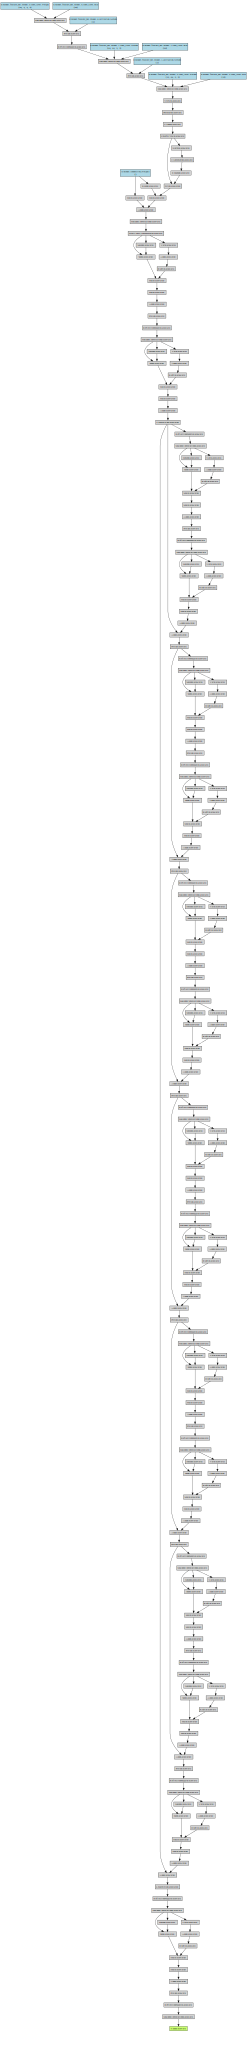

In [12]:
model.set_requires_grad(model.Generator, False)

encoded = model.Encoder(tensor)
generated = model.Generator(encoded)

torchviz.make_dot(generated, params=dict(model.named_parameters()))